# Test for Recommender System using SciKit-Surprise

### import libraries

In [1]:
# Useful starting lines
%matplotlib inline
import numpy as np
import scipy
import scipy.io
import scipy.sparse as sp
import matplotlib.pyplot as plt
import time
import datetime
%load_ext autoreload
%autoreload 2

In [2]:
# import scikit-surprise stuff
from surprise import SVD
from surprise import Reader
from surprise import Dataset
from surprise.model_selection import cross_validate, GridSearchCV

In [3]:
# import pandas for DataFrame
import pandas as pd

In [4]:
# import costum stuff
from utility import *

### Import train and test set

In [5]:
datafilepath = "../data/data_train.csv"
data_df = loadData2df(datafilepath)

In [6]:
predinfilepath = "../data/sample_submission.csv"
pred_df = loadData2df(predinfilepath)

### Compute and plot interesting stuff

In [7]:
figuresize=(5, 4)

#### Rating Distribution

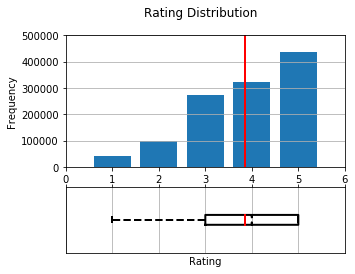

In [8]:
fig = plt.figure(figsize=figuresize)
fig.suptitle("Rating Distribution")
axlst = fig.subplots(2,1,sharex=False,gridspec_kw={"height_ratios":[2,1]})
myhist = axlst[0].hist(data_df["rating"],bins=[0.5+i for i in range(6)],align="mid",rwidth=0.8)
meanrating = data_df["rating"].mean()
meanplt = axlst[0].plot([meanrating,meanrating],[0,500000],lw=2,color="r")
axlst[0].axes.set_ylim([0,500000])
axlst[0].axes.set_xlim([0,6])
axlst[0].grid(axis="y")
axlst[0].axes.set_ylabel("Frequency")
mybxplt = axlst[1].boxplot(data_df["rating"],\
                           showmeans=True,vert=False,meanline=True,notch=True,\
                           meanprops={"color":"r","linestyle":"-","linewidth":2},\
                           medianprops={"color":"none"},\
                           boxprops={"linewidth":2},\
                           whiskerprops={"linestyle":"--","linewidth":2},\
                           capprops={"linewidth":2})
axlst[1].axes.set_xlim([0,6])
axlst[1].grid(axis="x")
axlst[1].tick_params(axis="y",which="both",left=False,right=False,labelleft=False)
axlst[1].tick_params(axis="x",which="both",bottom=False,top=True,labelbottom=False)
axlst[1].axes.set_xlabel("Rating")
fig.savefig("../report/hist_ratings.png")

#### Ratings per user & ratings per item

In [9]:
data_ustats,data_istats = generateStats(data_df)
pred_ustats,pred_istats = generateStats(pred_df)

train item mean: 1176.952
quiz item mean: 1176.952


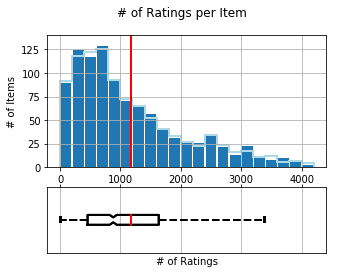

In [10]:
fig = plt.figure(figsize=figuresize)
fig.suptitle("# of Ratings per Item")
axlst = fig.subplots(2,1,sharex=False,gridspec_kw={"height_ratios":[2,1]})
myhist_d = axlst[0].hist(data_istats["ratingCount"],bins=[i for i in range(0,4201,200)],align="mid",rwidth=0.9,alpha=1)
myhist_p = axlst[0].hist(pred_istats["ratingCount"],bins=[i for i in range(0,4201,200)],align="mid",rwidth=0.9,alpha=1,lw=2,histtype="step",color="lightblue")
meanv = data_istats["ratingCount"].mean()
meanplt = axlst[0].plot([meanv,meanv],[0,140],lw=2,color="r")
axlst[0].axes.set_ylim([0,140])
#axlst[0].axes.set_xlim([0,6])
axlst[0].grid(which="both")
axlst[0].axes.set_ylabel("# of Items")
#axlst[0].axes.minorticks_on()
mybxplt_d = axlst[1].boxplot(data_istats["ratingCount"],\
                           showmeans=True,vert=False,meanline=True,notch=True,showfliers=False,\
                           meanprops={"color":"r","linestyle":"-","linewidth":2},\
                           medianprops={"color":"none"},\
                           boxprops={"linewidth":2},\
                           whiskerprops={"linestyle":"--","linewidth":2},\
                           capprops={"linewidth":2})
mybxplt_p = axlst[1].boxplot(pred_istats["ratingCount"],\
                           showmeans=True,vert=False,meanline=True,notch=True,showfliers=False,\
                           meanprops={"color":"r","linestyle":"-","linewidth":2},\
                           medianprops={"color":"none"},\
                           boxprops={"linewidth":2},\
                           whiskerprops={"linestyle":"--","linewidth":2},\
                           capprops={"linewidth":2})
axlst[1].axes.set_xlim(axlst[0].axes.get_xlim())
axlst[1].grid(axis="x")
axlst[1].tick_params(axis="y",which="both",left=False,right=False,labelleft=False)
axlst[1].tick_params(axis="x",which="both",bottom=False,top=True,labelbottom=False)
axlst[1].axes.set_xlabel("# of Ratings")
fig.savefig("../report/hist_items.png")
print("train item mean:",data_istats["ratingCount"].mean())
print("quiz item mean:",pred_istats["ratingCount"].mean())

train user mean: 117.6952
quiz user mean: 117.6952


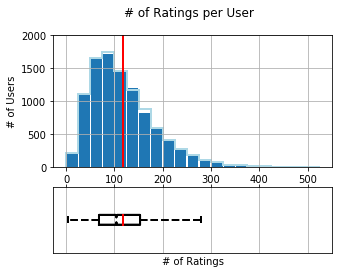

In [11]:
fig = plt.figure(figsize=figuresize)
fig.suptitle("# of Ratings per User")
axlst = fig.subplots(2,1,sharex=False,gridspec_kw={"height_ratios":[2,1]})
myhist_d = axlst[0].hist(data_ustats["ratingCount"],bins=[i for i in range(0,526,25)],align="mid",rwidth=0.9)
myhist_p = axlst[0].hist(pred_ustats["ratingCount"],bins=[i for i in range(0,526,25)],align="mid",rwidth=0.9,alpha=1,lw=2,histtype="step",color="lightblue")
meanv = data_ustats["ratingCount"].mean()
meanplt = axlst[0].plot([meanv,meanv],[0,2000],lw=2,color="r")
axlst[0].axes.set_ylim([0,2000])
#axlst[0].axes.set_xlim([0,6])
axlst[0].grid(which="both")
axlst[0].axes.set_ylabel("# of Users")
#axlst[0].axes.minorticks_on()
mybxplt_d = axlst[1].boxplot(data_ustats["ratingCount"],\
                           showmeans=True,vert=False,meanline=True,notch=True,showfliers=False,\
                           meanprops={"color":"r","linestyle":"-","linewidth":2},\
                           medianprops={"color":"none"},\
                           boxprops={"linewidth":2},\
                           whiskerprops={"linestyle":"--","linewidth":2},\
                           capprops={"linewidth":2})
mybxplt_p = axlst[1].boxplot(pred_ustats["ratingCount"],\
                           showmeans=True,vert=False,meanline=True,notch=True,showfliers=False,\
                           meanprops={"color":"r","linestyle":"-","linewidth":2},\
                           medianprops={"color":"none"},\
                           boxprops={"linewidth":2},\
                           whiskerprops={"linestyle":"--","linewidth":2},\
                           capprops={"linewidth":2})
axlst[1].axes.set_xlim(axlst[0].axes.get_xlim())
axlst[1].grid(axis="x")
axlst[1].tick_params(axis="y",which="both",left=False,right=False,labelleft=False)
axlst[1].tick_params(axis="x",which="both",bottom=False,top=True,labelbottom=False)
axlst[1].axes.set_xlabel("# of Ratings")
fig.savefig("../report/hist_users.png")
print("train user mean:",data_ustats["ratingCount"].mean())
print("quiz user mean:",pred_ustats["ratingCount"].mean())

average user rating mean: 3.8321255854690937
average item rating mean: 3.603684376319098


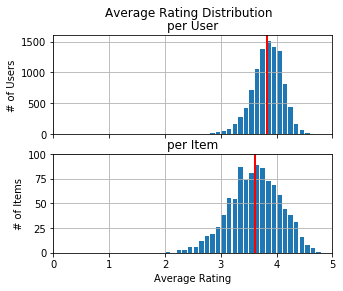

In [12]:
fig = plt.figure(figsize=figuresize)
fig.suptitle("Average Rating Distribution")
axlst = fig.subplots(2,1,sharex=False,gridspec_kw={"height_ratios":[1,1]})

myhist_d = axlst[0].hist(data_ustats["averageRating"].sort_values(),bins=[i*0.1 for i in range(50)],align="mid",rwidth=0.8)
meanv = data_ustats["averageRating"].mean()
meanplt = axlst[0].plot([meanv,meanv],[0,1600],lw=2,color="r")
axlst[0].axes.set_ylim([0,1600])
axlst[0].axes.set_xlim([0,5])
axlst[0].grid(which="both")
axlst[0].axes.set_ylabel("# of Users")
axlst[0].set_title("per User")
axlst[0].tick_params(axis="x",which="both",bottom=True,top=False,labelbottom=False)

myhist_d = axlst[1].hist(data_istats["averageRating"].sort_values(),bins=[i*0.1 for i in range(50)],align="mid",rwidth=0.8)
meanv = data_istats["averageRating"].mean()
meanplt = axlst[1].plot([meanv,meanv],[0,100],lw=2,color="r")
axlst[1].axes.set_ylim([0,100])
axlst[1].axes.set_xlim([0,5])
axlst[1].grid(which="both")
axlst[1].axes.set_ylabel("# of Items")
axlst[1].set_title("per Item")
axlst[1].set_xlabel("Average Rating")
fig.savefig("../report/hist_avr.png")
print("average user rating mean:",data_ustats["averageRating"].mean())
print("average item rating mean:",data_istats["averageRating"].mean())

### Test basic model i.e. meanonly

In [13]:
data_ds = loadData2ds(data_df)

In [41]:
gs = GridSearchCV(algo_class=MeanOnly,param_grid={"prefered":["mixed"],"wi":[0.5*i for i in range(21)],"wu":[0,1],"wg":[0]},cv=5,n_jobs=-1,joblib_verbose=2)

In [42]:
gs.fit(data_ds)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed: 14.1min
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed: 54.6min
[Parallel(n_jobs=-1)]: Done 210 out of 210 | elapsed: 75.2min finished


In [43]:
print(gs.best_score['rmse'])
print(gs.best_params['rmse'])

1.0304708776732738
{'prefered': 'mixed', 'wi': 0.5, 'wu': 0, 'wg': 0}


In [44]:
results_cv = pd.DataFrame.from_dict(gs.cv_results)

In [45]:
results_cv

,split0_test_rmse,split1_test_rmse,split2_test_rmse,split3_test_rmse,split4_test_rmse,mean_test_rmse,std_test_rmse,rank_test_rmse,split0_test_mae,split1_test_mae,...,rank_test_mae,mean_fit_time,std_fit_time,mean_test_time,std_test_time,params,param_prefered,param_wi,param_wu,param_wg
0,1.119303,1.119121,1.118047,1.117696,1.121118,1.119057,0.001199,26,0.923557,0.924191,...,23,0.689061,0.078562,4.089146,0.402555,"{'prefered': 'mixed', 'wi': 0.0, 'wu': 0, 'wg'...",mixed,0.0,0,0
1,3.069142,3.067917,3.070146,3.068690,3.065960,3.068371,0.001405,42,2.857654,2.856430,...,42,0.707607,0.049967,3.675859,0.254193,"{'prefered': 'mixed', 'wi': 0.0, 'wu': 1, 'wg'...",mixed,0.0,1,0
2,1.030671,1.032597,1.029914,1.028158,1.031015,1.030471,0.001451,17,0.838986,0.841149,...,17,0.719179,0.093156,3.510856,0.399797,"{'prefered': 'mixed', 'wi': 0.5, 'wu': 0, 'wg'...",mixed,0.5,0,0
3,2.784130,2.783553,2.785183,2.784089,2.780587,2.783508,0.001554,41,2.581973,2.581153,...,41,0.659763,0.100847,3.238955,0.378887,"{'prefered': 'mixed', 'wi': 0.5, 'wu': 1, 'wg'...",mixed,0.5,1,0
4,1.030671,1.032597,1.029914,1.028158,1.031015,1.030471,0.001451,15,0.838986,0.841149,...,15,0.622463,0.027643,3.030263,0.236005,"{'prefered': 'mixed', 'wi': 1.0, 'wu': 0, 'wg'...",mixed,1.0,0,0
5,2.197822,2.197626,2.198626,2.197768,2.194263,2.197221,0.001520,40,1.987052,1.986133,...,40,0.687207,0.124034,3.121612,0.315783,"{'prefered': 'mixed', 'wi': 1.0, 'wu': 1, 'wg'...",mixed,1.0,1,0
6,1.030671,1.032597,1.029914,1.028158,1.031015,1.030471,0.001451,13,0.838986,0.841149,...,13,0.761006,0.106698,3.398034,0.225429,"{'prefered': 'mixed', 'wi': 1.5, 'wu': 0, 'wg'...",mixed,1.5,0,0
7,1.863847,1.863965,1.864510,1.863674,1.860443,1.863288,0.001450,39,1.657398,1.656334,...,39,0.823138,0.175645,3.577674,0.342267,"{'prefered': 'mixed', 'wi': 1.5, 'wu': 1, 'wg'...",mixed,1.5,1,0
8,1.030671,1.032597,1.029914,1.028158,1.031015,1.030471,0.001451,11,0.838986,0.841149,...,11,0.760508,0.231654,3.296613,0.575495,"{'prefered': 'mixed', 'wi': 2.0, 'wu': 0, 'wg'...",mixed,2.0,0,0
9,1.654405,1.654774,1.654941,1.654080,1.651193,1.653878,0.001376,38,1.452101,1.451185,...,38,0.539613,0.145724,2.347580,0.442107,"{'prefered': 'mixed', 'wi': 2.0, 'wu': 1, 'wg'...",mixed,2.0,1,0


### Bias-Variance Decomposition SVD

#### n_factors

In [46]:
g_bvSVD_nfact = {\
'n_factors': [1,2,5,10,20,50],\
'lr_all': [0.01],\
'reg_all': [0.1],\
'n_epochs': [20],\
'biased': [True]}

In [47]:
gs_bvSVD_nfact = GridSearchCV(algo_class=SVD,param_grid=g_bvSVD_nfact,measures=['RMSE'], cv=20, n_jobs=-1,joblib_verbose=2)

In [48]:
gs_bvSVD_nfact.fit(data_ds)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed: 13.9min
[Parallel(n_jobs=-1)]: Done 120 out of 120 | elapsed: 59.3min finished


In [49]:
print(gs_bvSVD_nfact.best_score['rmse'])
print(gs_bvSVD_nfact.best_params['rmse'])

1.0035380179475002
{'n_factors': 50, 'lr_all': 0.01, 'reg_all': 0.1, 'n_epochs': 20, 'biased': True}


In [50]:
results_cv = pd.DataFrame.from_dict(gs_bvSVD_nfact.cv_results)
results_cv_path = "../data/cvresults/cv-bvSVD_nfact.csv"
results_cv_path = addDateAndTime(results_cv_path)
results_cv.to_csv(path_or_buf=results_cv_path,mode="w")
print(results_cv_path)

../data/cvresults/cv-bvSVD_nfact_2018-12-20_1248.csv


#### reg_all

In [57]:
g_bvSVD_regall = {\
'n_factors': [10],\
'lr_all': [0.01],\
'reg_all': [0.01,0.05,0.1,0.5,1.0,5.0],\
'n_epochs': [20],\
'biased': [True]}

In [58]:
gs_bvSVD_regall = GridSearchCV(algo_class=SVD,param_grid=g_bvSVD_regall,measures=['RMSE'], cv=20, n_jobs=-1,joblib_verbose=2)

In [59]:
gs_bvSVD_regall.fit(data_ds)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed: 39.6min
[Parallel(n_jobs=-1)]: Done 120 out of 120 | elapsed: 125.8min finished


In [60]:
print(gs_bvSVD_regall.best_score['rmse'])
print(gs_bvSVD_regall.best_params['rmse'])

0.9947285499297699
{'n_factors': 10, 'lr_all': 0.01, 'reg_all': 0.05, 'n_epochs': 20, 'biased': True}


In [61]:
results_cv = pd.DataFrame.from_dict(gs_bvSVD_regall.cv_results)
results_cv_path = "../data/cvresults/cv-bvSVD_regall.csv"
results_cv_path = addDateAndTime(results_cv_path)
results_cv.to_csv(path_or_buf=results_cv_path,mode="w")
print(results_cv_path)

../data/cvresults/cv-bvSVD_regall_2018-12-20_1622.csv


In [62]:
#### n_factors higher

#### n_factors

In [46]:
g_bvSVD_nfact = {\
'n_factors': [100,500],\
'lr_all': [0.01],\
'reg_all': [0.1],\
'n_epochs': [20],\
'biased': [True]}

In [47]:
gs_bvSVD_nfact = GridSearchCV(algo_class=SVD,param_grid=g_bvSVD_nfact,measures=['RMSE'], cv=20, n_jobs=-1,joblib_verbose=2)

In [48]:
gs_bvSVD_nfact.fit(data_ds)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed: 13.9min
[Parallel(n_jobs=-1)]: Done 120 out of 120 | elapsed: 59.3min finished


In [49]:
print(gs_bvSVD_nfact.best_score['rmse'])
print(gs_bvSVD_nfact.best_params['rmse'])

1.0035380179475002
{'n_factors': 50, 'lr_all': 0.01, 'reg_all': 0.1, 'n_epochs': 20, 'biased': True}


In [50]:
results_cv = pd.DataFrame.from_dict(gs_bvSVD_nfact.cv_results)
results_cv_path = "../data/cvresults/cv-bvSVD_nfact.csv"
results_cv_path = addDateAndTime(results_cv_path)
results_cv.to_csv(path_or_buf=results_cv_path,mode="w")
print(results_cv_path)

../data/cvresults/cv-bvSVD_nfact_2018-12-20_1248.csv
